# Visualize local ancestry by chromosome

Kynon J Benjamin  
2024-07-03

# 1. Load packages

In [1]:
import session_info
import pandas as pd
import seaborn as sns
from pyhere import here
import matplotlib.pyplot as plt
from rfmix_reader import read_rfmix

# 2. Load data

In [2]:
prefix_path = here("input/real_data/_m/")
binary_dir = here("real_data/gpu_version/_m/binary_files/")
_, rf_q, _ = read_rfmix(prefix_path, binary_dir=binary_dir)

GPU 0: NVIDIA A100 80GB PCIe
  Total memory: 79.15 GB
  CUDA capability: 8.0
Multiple files read in this order: ['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21', 'chr22', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9']

Mapping fb files:   0%|          | 0/22 [00:00<?, ?it/s]Mapping fb files:   5%|▍         | 1/22 [00:00<00:03,  6.21it/s]Mapping fb files:   9%|▉         | 2/22 [00:00<00:02,  7.83it/s]Mapping fb files:  14%|█▎        | 3/22 [00:00<00:02,  8.64it/s]Mapping fb files:  23%|██▎       | 5/22 [00:00<00:01, 10.16it/s]Mapping fb files:  32%|███▏      | 7/22 [00:00<00:01, 12.18it/s]Mapping fb files:  41%|████      | 9/22 [00:00<00:00, 13.55it/s]Mapping fb files:  50%|█████     | 11/22 [00:01<00:01, 10.42it/s]Mapping fb files:  59%|█████▉    | 13/22 [00:01<00:00,  9.97it/s]Mapping fb files:  73%|███████▎  | 16/22 [00:01<00:00, 11.67it/s]Mapping fb files:  82%|████████▏ | 18/22 [00:01<00:00,  9.91it/s]Mapping fb files:  91%|█████████ | 20/22 [00:01<00:00,  9.30it/s]Mapping fb files:  95%|█████████▌| 21/22 [00:02<00:00,  9.16it/s]Mapping fb files: 100%|██████████| 22/22 [00:02<00:00,  7.28it/s]Mapping fb files: 100%|██████████| 22/22 [00:02<00:00,  9.31it/s]

In [3]:
rf_q.shape

(11572, 4)

In [4]:
rf_q.head()

# 3. Generate plots

## 3.1 Sort chromosomes in the correct order

In [5]:
chrom_order = [f'chr{i}' for i in range(1, 23)]

In [6]:
rf_q_pandas = rf_q.to_pandas() # Convert cuDF to pandas DataFrame
rf_q_pandas['chrom'] = pd.Categorical(rf_q_pandas['chrom'], 
                                      categories=chrom_order, ordered=True)

## 3.2 Sort the dataframe by chromosome

In [7]:
rf_q_sorted = rf_q_pandas.sort_values('chrom')
rf_q_sorted.head()

## 3.3 Create and save the plot

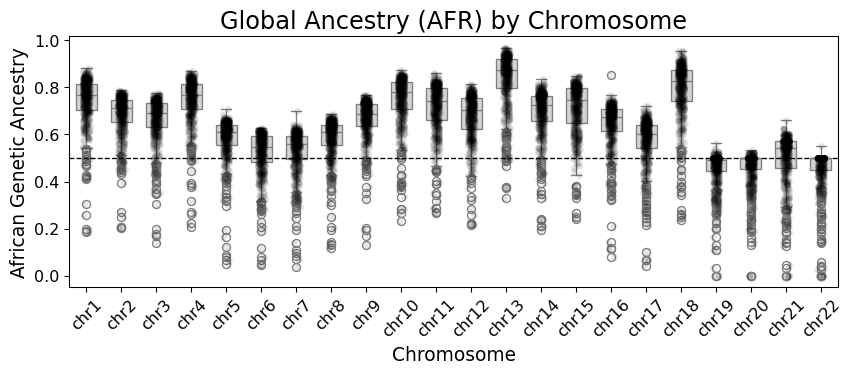

In [8]:
plt.figure(figsize=(9, 4))
sns.boxplot(x='chrom', y='AFR', data=rf_q_sorted, 
            color='lightgray', width=0.6)
sns.stripplot(x='chrom', y='AFR', data=rf_q_sorted, 
              color='black', alpha=0.1, jitter=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1)
plt.title('Global Ancestry (AFR) by Chromosome', fontsize=18)
plt.xlabel('Chromosome', fontsize=14)
plt.ylabel('African Genetic Ancestry', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('global_ancestry_boxplot.pdf', dpi=300, bbox_inches='tight')

# 4. Session information

In [9]:
session_info.show()

Click to view session information 
 
-----
cudf 24.06.00
dask 2024.6.2
matplotlib 3.7.1
pandas 2.0.3
pyhere 1.0.0
rfmix_reader 0.1.14
seaborn 0.13.2
session_info 1.0.0
-----
 
 
 Click to view modules imported as dependencies 
 
PIL 10.3.0
anyio NA
argcomplete NA
arrow 1.2.3
asttokens NA
astunparse 1.6.3
attr 23.2.0
attrs 23.2.0
babel 2.10.3
backcall 0.2.0
cachetools 5.3.3
cairo 1.20.1
certifi 2024.02.02
cffi 1.16.0
chardet 4.0.0
charset_normalizer 3.3.2
cloudpickle 2.1.0
comm 0.2.2
cuda 12.4.0
cupy 13.1.0
cupy_backends NA
cupyx NA
cycler 0.10.0
cython_runtime NA
dask_expr 1.1.6
dateutil 2.8.2
debugpy 1.6.3
decorator 5.1.1
defusedxml 0.7.1
dot_parser NA
exceptiongroup 1.2.0
executing 0.10.0
fastjsonschema NA
fastrlock 0.8.2
fontTools 4.33.3
fqdn NA
fsspec 2022.7.1
gi 3.40.1
gio NA
glib NA
gobject NA
google NA
gtk NA
idna 2.10
importlib_metadata NA
importlib_resources NA
iniconfig NA
ipykernel 6.15.1
ipywidgets 8.1.2
isoduration NA
jedi 0.19.1
jinja2 3.1.1
json5 NA
jsonpointer 2.3
jsonschema 4.21.1
jsonschema_specifications NA
jupyter_events 0.10.0
jupyter_server 2.13.0
jupyterlab_server 2.25.4
kaleido 0.2.1
kiwisolver 1.4.3
llvmlite 0.42.0
lxml 4.9.1
markupsafe 2.1.1
matplotlib_inline 0.1.6
mpl_toolkits NA
nbformat 5.4.0
netifaces 0.10.6
numba 0.59.0
numexpr 2.10.1
numpy 1.26.4
nvtx NA
optree 0.11.0
overrides NA
packaging 21.3
parso 0.8.3
patsy 0.5.2
pexpect 4.8.0
pickleshare 0.7.5
pkg_resources NA
platformdirs 3.8.0
plotly 5.9.0
pluggy 1.5.0
prometheus_client NA
prompt_toolkit 3.0.30
psutil 5.9.8
ptyprocess 0.7.0
pure_eval 0.2.2
py 1.11.0
pyarrow 16.1.0
pydev_ipython NA
pydevconsole NA
pydevd 2.8.0
pydevd_file_utils NA
pydevd_plugins NA
pydevd_tracing NA
pydot 1.4.2
pygments 2.18.0
pynvml 11.4.1
pyparsing 3.0.9
pytest 8.2.1
pythonjsonlogger NA
pytz 2022.1
rapids_dask_dependency NA
referencing NA
requests 2.31.0
rfc3339_validator 0.1.4
rfc3986_validator 0.1.1
rmm 24.06.00
rpds NA
scipy 1.13.1
send2trash NA
setuptools 70.0.0
six 1.16.0
sniffio 1.2.0
socks 1.7.1
sphinxcontrib NA
stack_data 0.4.0
statsmodels 0.14.0
tblib 3.0.0
tenacity NA
tlz 0.12.0
toolz 0.12.0
torch 2.3.1+cu121
torchgen NA
tornado 6.2
tqdm 4.66.4
traitlets 5.9.0
typing_extensions NA
uri_template NA
urllib3 1.26.18
wcwidth 0.2.5
webcolors 1.11.1
websocket 1.4.0
yaml 6.0
zipp NA
zmq 25.0.0
zoneinfo NA
zope NA
zstandard 0.18.0
 
 <!-- seems like this ends pre, so might as well be explicit -->
 
-----
IPython 8.4.0
jupyter_client 8.0.2
jupyter_core 5.2.0
jupyterlab 4.1.5
notebook 7.1.2
-----
Python 3.9.16 (main, Dec 8 2022, 00:00:00) [GCC 11.3.1 20221121 (Red Hat 11.3.1-4)]
Linux-5.14.0-284.11.1.el9_2.x86_64-x86_64-with-glibc2.34
-----
Session information updated at 2024-07-12 08:39